- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
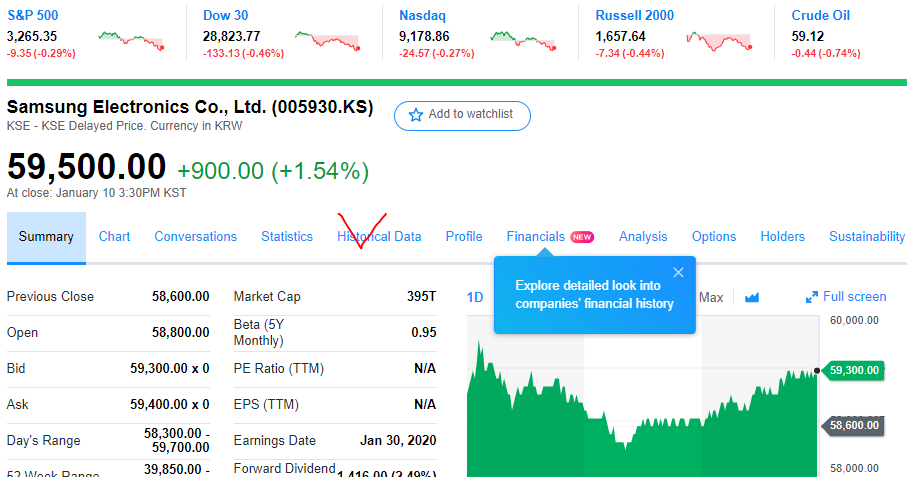

- 기간 선택 후 Download Data 클릭
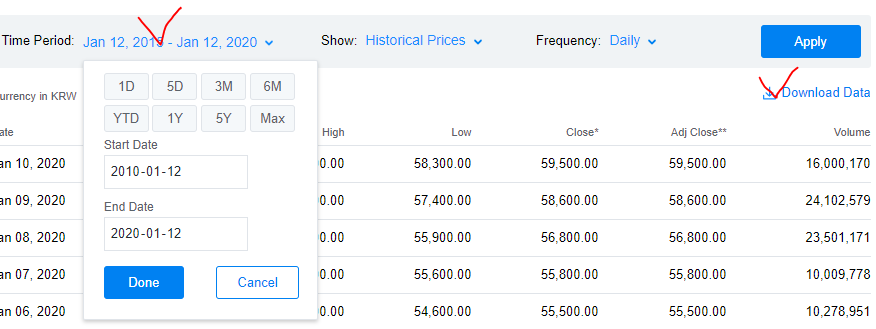

## Data Loading 및 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('005935.KS.csv')
df.shape

(3872, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-10-03,9080.0,9080.0,9080.0,9080.0,6543.067871,0.0
1,2005-10-04,9070.0,9290.0,9070.0,9160.0,6600.714355,3475500.0
2,2005-10-05,9290.0,9430.0,9160.0,9230.0,6651.158203,3276650.0
3,2005-10-06,9100.0,9160.0,8930.0,9010.0,6492.625000,3794000.0
4,2005-10-07,8840.0,8940.0,8770.0,8900.0,6413.358398,2334000.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3867,2021-05-10,74900.0,75200.0,74600.0,74900.0,74900.0,1760900.0
3868,2021-05-11,74600.0,74600.0,74000.0,74100.0,74100.0,1451334.0
3869,2021-05-12,74100.0,74100.0,73100.0,73500.0,73500.0,1916667.0
3870,2021-05-13,72100.0,73000.0,71600.0,72200.0,72200.0,2162028.0
3871,2021-05-14,72700.0,73400.0,72700.0,73400.0,73400.0,439432.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3872 non-null   object 
 1   Open       3867 non-null   float64
 2   High       3867 non-null   float64
 3   Low        3867 non-null   float64
 4   Close      3867 non-null   float64
 5   Adj Close  3867 non-null   float64
 6   Volume     3867 non-null   float64
dtypes: float64(6), object(1)
memory usage: 211.9+ KB


In [7]:
# 결측치 확인
df[df['Open'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
3014,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
3019,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
3043,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
3256,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
3501,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


# 전처리
- date를 index
- 결측치 제거
- Adj Close 컬럼 제거
- MinMaxScaling

In [8]:
# date를 index
# date: object -> datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3872 non-null   datetime64[ns]
 1   Open       3867 non-null   float64       
 2   High       3867 non-null   float64       
 3   Low        3867 non-null   float64       
 4   Close      3867 non-null   float64       
 5   Adj Close  3867 non-null   float64       
 6   Volume     3867 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 211.9 KB


In [9]:
df.set_index('Date', inplace = True)

In [10]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-10-03,9080.0,9080.0,9080.0,9080.0,6543.067871,0.0
2005-10-04,9070.0,9290.0,9070.0,9160.0,6600.714355,3475500.0


<AxesSubplot:xlabel='Date'>

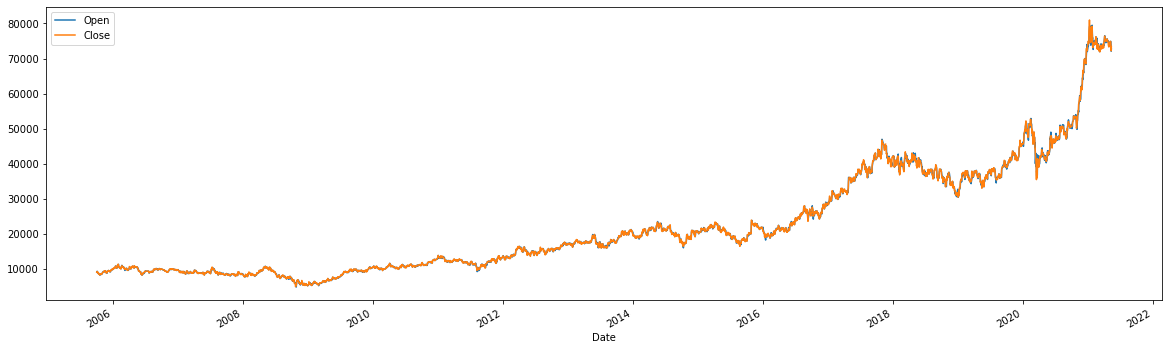

In [11]:
# Open, Close 가격으로 그래프 그리기
df[['Open', 'Close']].plot(figsize = (20, 6))

<AxesSubplot:xlabel='Date'>

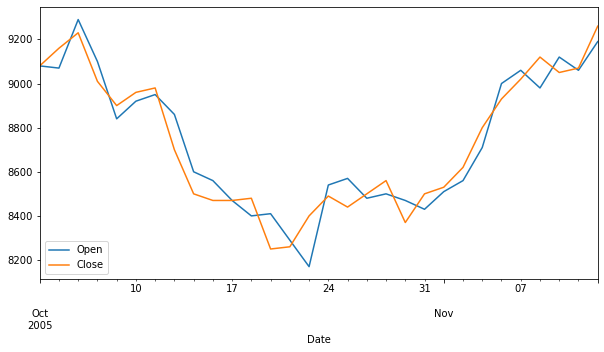

In [12]:
df[['Open', 'Close']].iloc[:30].plot(figsize = (10, 5))

In [13]:
# 결측치 처리
df.dropna(inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3867 entries, 2005-10-03 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3867 non-null   float64
 1   High       3867 non-null   float64
 2   Low        3867 non-null   float64
 3   Close      3867 non-null   float64
 4   Adj Close  3867 non-null   float64
 5   Volume     3867 non-null   float64
dtypes: float64(6)
memory usage: 211.5 KB


In [15]:
# Adj close 컬럼 제거
df.drop(columns = ['Adj Close'], inplace = True)

In [16]:
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2005-10-03,9080.0,9080.0,9080.0,9080.0,0.0
2005-10-04,9070.0,9290.0,9070.0,9160.0,3475500.0


### X, y 분리

In [17]:
# df['Close']: Series. Series_to_frame():Series => DataFrame(2차원)
df_y = df['Close'].to_frame()
df_X = df

### Scaling - MinMaxScaler
- Scaler를 X, y용 따로 만ema
    - y를 inverse 하기 위해

In [18]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = X_scaler.fit_transform(df_X)
y = y_scaler.fit_transform(df_y)

In [19]:
X[:3]

array([[0.05729585, 0.04801568, 0.05768194, 0.05480352, 0.        ],
       [0.05716198, 0.05058795, 0.05754717, 0.05585491, 0.04378687],
       [0.0601071 , 0.05230279, 0.05876011, 0.05677487, 0.04128162]])

In [20]:
y[:3]

array([[0.05480352],
       [0.05585491],
       [0.05677487]])

In [21]:
y_scaler.inverse_transform(y[:3])

array([[9080.],
       [9160.],
       [9230.]])

##  날짜 종가 예측
- X: 50일치 주가, y: 51일째 주가
    - 50일의 연속된 주식가격으로 51일째 주가를 예측
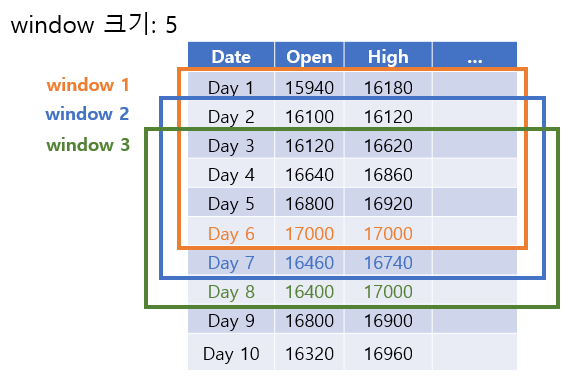     

- X, y를 만들기
- 각 index에 window size의 데이터셋 들어가도록 함

In [22]:
# 1개 input 값에 들어갈 연소된 값의 개수
window_size = 50
data_X = []  # [[1-50], [2-51], [3-52],....]
data_y = []  # [51, 52, 53]

for i in range(0, len(y)-window_size):
    data_X.append(X[i:i+window_size])
    data_y.append(y[i+window_size])

In [23]:
np.shape(data_X)

(3817, 50, 5)

In [24]:
np.shape(data_y)

(3817, 1)

## Train, Test 분리

In [25]:
# train:test = 8:2
train_index = int(len(data_y) * 0.8)
print(train_index)

3053


In [26]:
X_train, y_train = np.array(data_X[0:train_index]), np.array(data_y[0:train_index])
X_test, y_test = np.array(data_X[train_index:]), np.array(data_y[train_index:])

In [27]:
X_train.shape, X_test.shape

((3053, 50, 5), (764, 50, 5))

In [28]:
type(data_X[0:train_index])

list

## Model 생성
- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있음 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용
- Dese에는 False로 해서 하나만 전달
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상

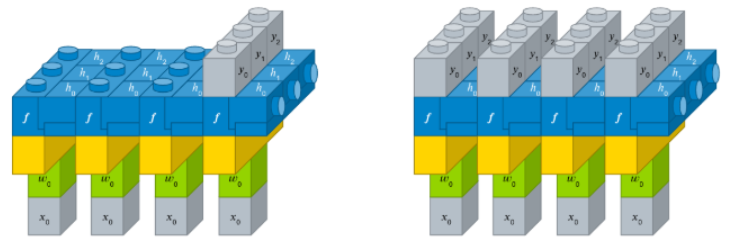

<center>[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]</center>

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 50
N_BATCHS = 100
N_TRAIN = X_train.shape[0]
N_TEST = X_train.shape[0]

In [31]:
# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder = True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [32]:
X_train.shape

(3053, 50, 5)

In [33]:
# 모델 구성
def create_model():
    model = keras.Sequential()
    model.add(layers.Input((window_size, 5)))
    # LSTM
    model.add(layers.LSTM(32, activation = 'relu', return_sequences = False))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dense(1))  # 회귀
    
    return model

In [34]:
model = create_model()
model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4864      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


## 모델 학습, 평가

In [35]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

history = model.fit(train_dataset, epochs = N_EPOCHS, steps_per_epoch = steps_per_epoch,
                     validation_data = test_dataset, validation_steps = validation_steps)

Epoch 1/50
30/30 [==============================] - 2s 83ms/step - loss: 0.0108 - val_loss: 0.0083
Epoch 2/50
30/30 [==============================] - 1s 38ms/step - loss: 2.1020e-04 - val_loss: 0.0175
Epoch 3/50
30/30 [==============================] - 1s 37ms/step - loss: 6.5892e-05 - val_loss: 0.0073
Epoch 4/50
30/30 [==============================] - 1s 35ms/step - loss: 5.7931e-05 - val_loss: 0.0032
Epoch 5/50
30/30 [==============================] - 1s 35ms/step - loss: 5.4246e-05 - val_loss: 8.1144e-04
Epoch 6/50
30/30 [==============================] - 1s 37ms/step - loss: 5.4840e-05 - val_loss: 5.0752e-04
Epoch 7/50
30/30 [==============================] - 1s 42ms/step - loss: 5.2928e-05 - val_loss: 7.6204e-04
Epoch 8/50
30/30 [==============================] - 1s 40ms/step - loss: 4.9935e-05 - val_loss: 0.0010
Epoch 9/50
30/30 [==============================] - 1s 39ms/step - loss: 5.0460e-05 - val_loss: 0.0019
Epoch 10/50
30/30 [==============================] - 1s 45ms/step

30/30 [==============================] - 1s 39ms/step - loss: 4.6472e-05 - val_loss: 0.0015
Epoch 20/50
30/30 [==============================] - 2s 57ms/step - loss: 4.4132e-05 - val_loss: 0.0018
Epoch 21/50
30/30 [==============================] - 2s 60ms/step - loss: 4.6391e-05 - val_loss: 0.0017
Epoch 22/50
30/30 [==============================] - 2s 71ms/step - loss: 4.3989e-05 - val_loss: 0.0016
Epoch 23/50
30/30 [==============================] - 2s 57ms/step - loss: 4.2966e-05 - val_loss: 0.0019
Epoch 24/50
30/30 [==============================] - 1s 42ms/step - loss: 4.4061e-05 - val_loss: 0.0014
Epoch 25/50
30/30 [==============================] - 1s 35ms/step - loss: 4.5908e-05 - val_loss: 7.6528e-04
Epoch 26/50
30/30 [==============================] - 1s 33ms/step - loss: 4.5321e-05 - val_loss: 6.7579e-04
Epoch 27/50
30/30 [==============================] - 1s 29ms/step - loss: 4.3175e-05 - val_loss: 7.2971e-04
Epoch 28/50
30/30 [==============================] - 1s 29ms/ste

30/30 [==============================] - 1s 25ms/step - loss: 4.2023e-05 - val_loss: 4.2263e-04
Epoch 39/50
30/30 [==============================] - 1s 24ms/step - loss: 4.0984e-05 - val_loss: 3.2862e-04
Epoch 40/50
30/30 [==============================] - 1s 26ms/step - loss: 4.1950e-05 - val_loss: 4.4767e-04
Epoch 41/50
30/30 [==============================] - 1s 27ms/step - loss: 3.8914e-05 - val_loss: 2.1615e-04
Epoch 42/50
30/30 [==============================] - 1s 24ms/step - loss: 3.8993e-05 - val_loss: 2.5831e-04
Epoch 43/50
30/30 [==============================] - 1s 25ms/step - loss: 3.9102e-05 - val_loss: 2.1007e-04
Epoch 44/50
30/30 [==============================] - 1s 24ms/step - loss: 4.1956e-05 - val_loss: 1.9261e-04
Epoch 45/50
30/30 [==============================] - 1s 48ms/step - loss: 3.5927e-05 - val_loss: 2.0152e-04
Epoch 46/50
30/30 [==============================] - 1s 31ms/step - loss: 3.7908e-05 - val_loss: 2.9708e-04
Epoch 47/50
30/30 [=====================

In [37]:
# 평가
loss = model.evaluate(test_dataset)

8/8 [==============================] - 0s 10ms/step - loss: 1.5989e-04


In [39]:
y_scaler.inverse_transform(np.array(loss).reshape(-1, 1))

array([[4922.16572878]])

## 예측

In [41]:
pred = model.predict(X_test)
pred_price = y_scaler.inverse_transform(pred)

In [42]:
pred_price[-3:]

array([[74649.58 ],
       [74220.555],
       [73058.28 ]], dtype=float32)

In [45]:
y_price = y_scaler.inverse_transform(y_test)

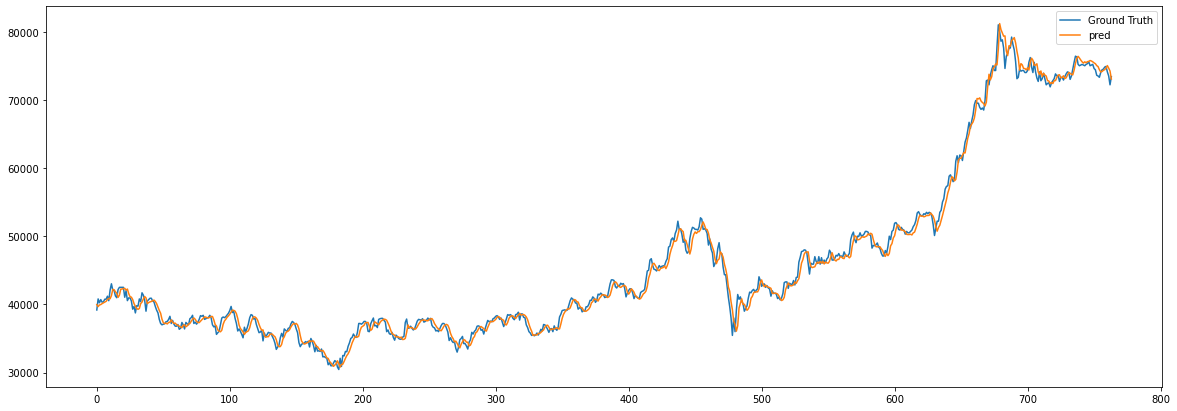

In [47]:
# 실제값, 예측값을 그래프로 비교
plt.figure(figsize = (20, 7))
plt.plot(y_price, label = 'Ground Truth')
plt.plot(pred_price[:,0], label = 'pred')
plt.legend()
plt.show()